<a href="https://colab.research.google.com/github/jorgecote/Seminario/blob/main/Clasificaci%C3%B3n_n%C3%BAmeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASIFICACIÓN NUMEROS A MANO ALZADA

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
datos = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels)=datos.load_data()


## Exploración datos

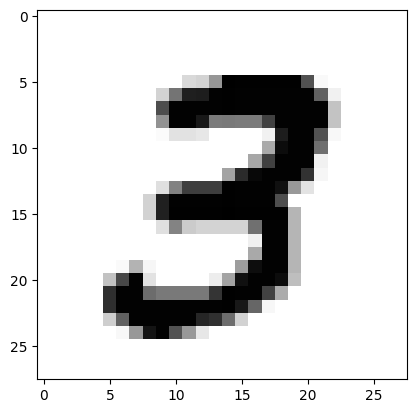

In [6]:
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

In [7]:
print(train_images[7])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 13

## Preprocesamiento

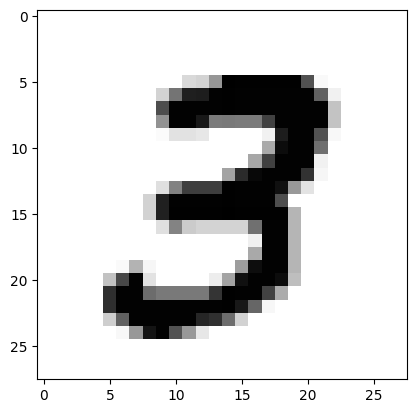

In [8]:
train_images=train_images/255.0
test_images=test_images/255.0
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

## MODELO


In [31]:
model=tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(28,28)),
   tf.keras.layers.Dense(128,activation='relu'),
   tf.keras.layers.Dense(10,activation='softmax'),
])

### Compilación del modelo

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Entrenamiento

In [33]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5783 - accuracy: 0.8569
Epoch 2/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3712 - accuracy: 0.9098
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2960 - accuracy: 0.9228
Epoch 4/4
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2598 - accuracy: 0.9326


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 10)                20        
                                                                 
Total params: 805 (3.14 KB)
Trainable params: 805 (3.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Validación

In [13]:
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('Tested Acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.6695 - accuracy: 0.3004
Tested Acc: 0.3003999888896942


## Probando el modelo

In [16]:
import numpy as np
prediccion=model.predict(test_images)
print(np.argmax(prediccion[1]))

313/313 [==============================] - 1s 2ms/step
0


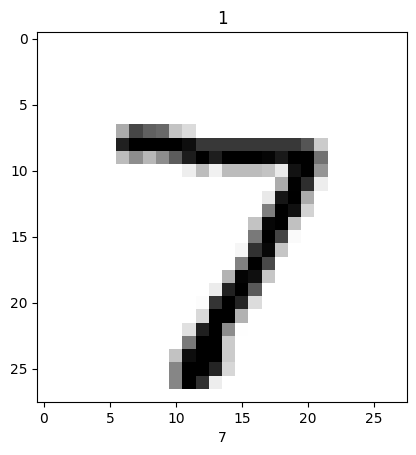

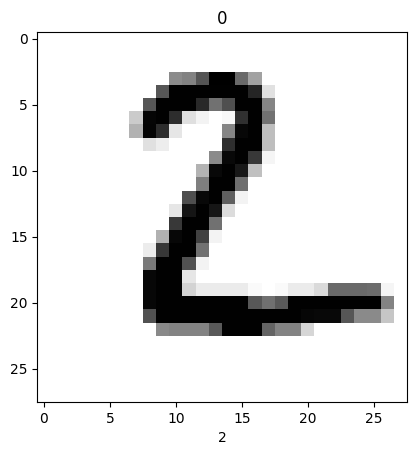

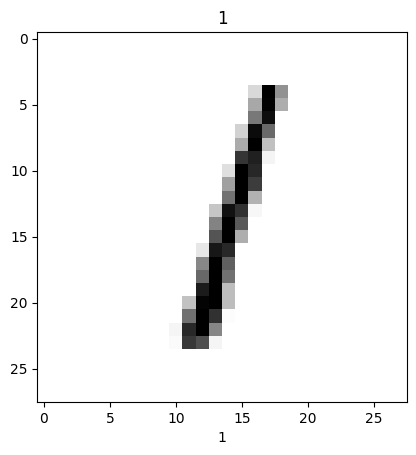

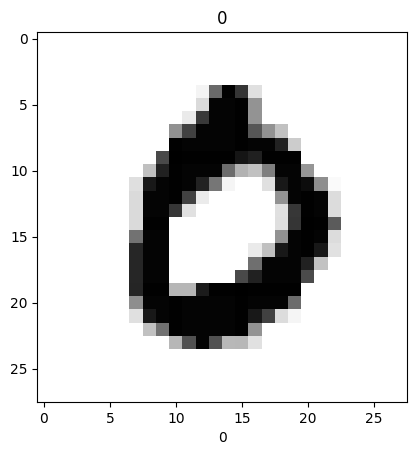

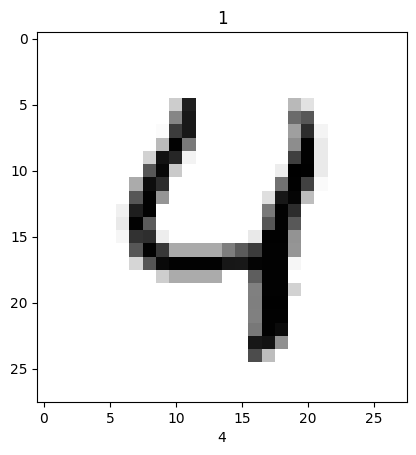

In [29]:
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(test_labels[i])
  plt.title(np.argmax(prediccion[i]))
  plt.show()

In [26]:
print(test_labels[i])

7
